<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(r'C:\Users\Abram Fadl\Documents\decision_tree_table.xlsx')
df

,Data Type,Data Ownership,Data Sensitivity,Data Size,Access Control,Can Be Shared
0,Text,Organization,High,Small,Role Restricted,No
1,Image,User,Normal,Large,Open Access,Yes
2,Video,Organization,High,Large,Role Restricted,No
3,Audio,User,Normal,Small,Open Access,Yes
4,Text,User,High,Small,Role Restricted,No
5,Image,Organization,Normal,Small,Role Restricted,No
6,Video,User,High,Large,Open Access,No
7,Audio,Organization,Normal,Large,Role Restricted,No
8,Text,Organization,Normal,Small,Open Access,Yes
9,Image,User,High,Large,Role Restricted,No


In [4]:
inputs = df.drop('Can Be Shared',axis='columns')

In [5]:
target = df['Can Be Shared']

In [6]:
from sklearn.preprocessing import LabelEncoder
le_type = LabelEncoder()
le_ownership = LabelEncoder()
le_sensitivity = LabelEncoder()
le_size = LabelEncoder()
le_access = LabelEncoder()

In [7]:
inputs['type_n'] = le_type.fit_transform(inputs['Data Type'])
inputs['ownership_n'] = le_ownership.fit_transform(inputs['Data Ownership'])
inputs['sensitivity_n'] = le_sensitivity.fit_transform(inputs['Data Sensitivity'])
inputs['size_n'] = le_size.fit_transform(inputs['Data Size'])
inputs['access_n'] = le_access.fit_transform(inputs['Access Control'])

In [8]:
inputs

,Data Type,Data Ownership,Data Sensitivity,Data Size,Access Control,type_n,ownership_n,sensitivity_n,size_n,access_n
0,Text,Organization,High,Small,Role Restricted,3,0,0,1,1
1,Image,User,Normal,Large,Open Access,2,1,1,0,0
2,Video,Organization,High,Large,Role Restricted,4,0,0,0,1
3,Audio,User,Normal,Small,Open Access,0,1,1,1,0
4,Text,User,High,Small,Role Restricted,3,1,0,1,1
5,Image,Organization,Normal,Small,Role Restricted,2,0,1,1,1
6,Video,User,High,Large,Open Access,4,1,0,0,0
7,Audio,Organization,Normal,Large,Role Restricted,0,0,1,0,1
8,Text,Organization,Normal,Small,Open Access,3,0,1,1,0
9,Image,User,High,Large,Role Restricted,2,1,0,0,1


In [9]:
inputs_n = inputs.drop(['Data Type','Data Ownership','Data Sensitivity','Data Size','Access Control'],axis='columns')

In [10]:
inputs_n

,type_n,ownership_n,sensitivity_n,size_n,access_n
0,3,0,0,1,1
1,2,1,1,0,0
2,4,0,0,0,1
3,0,1,1,1,0
4,3,1,0,1,1
5,2,0,1,1,1
6,4,1,0,0,0
7,0,0,1,0,1
8,3,0,1,1,0
9,2,1,0,0,1


In [11]:
target

0      No
1     Yes
2      No
3     Yes
4      No
5      No
6      No
7      No
8     Yes
9      No
10     No
11     No
12    Yes
13     No
14     No
15     No
16     No
17    Yes
18     No
19    Yes
20     No
21     No
22    Yes
23     No
24     No
Name: Can Be Shared, dtype: object

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [14]:
model.score(inputs_n,target)

1.0

In [15]:
X = pd.DataFrame([[2, 1, 1, 0, 1]], columns=['type_n', 'ownership_n', 'sensitivity_n', 'size_n', 'access_n'])
model.predict(X)

array(['No'], dtype=object)

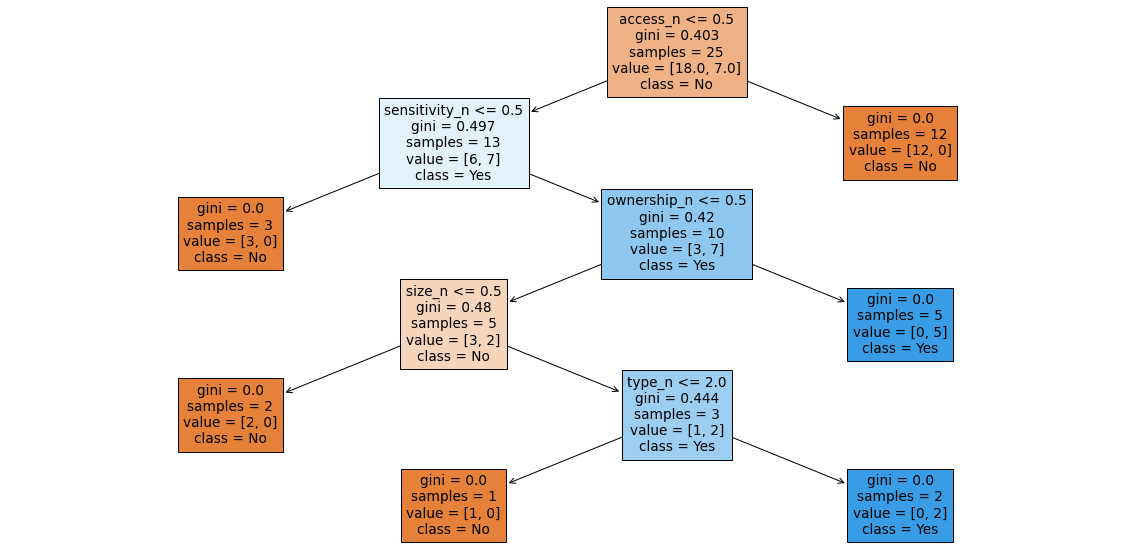

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model, feature_names=inputs_n.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [17]:
def printAttributeType(x):
  if(x == 3):
    return "Text"
  elif(x == 2):
    return "Image"
  elif(x == 0):
    return "Audio"
  elif(x == 4):
    return "Video"
  return "Combination"

def printAttributeOwnership(x):
  if(x == 0):
    return "Organization"
  return "User"

def printAttributeSensitivity(x):
  if(x == 0):
    return "High"
  return "Normal"

def printAttributeSize(x):
  if(x == 0):
    return "Large"
  return "Small"

def printAttributeAccess(x):
  if(x == 0):
    return "Open Access"
  return "Role-Restricted"

In [18]:
a=0
b=0
c=0
d=0
e=0
output = []
while(a <= 4):
  b = 0
  while(b <= 1):
    c = 0
    while(c <= 1):
      d = 0
      while(d <= 1):
        e = 0
        while(e <= 1):
          X = pd.DataFrame([[a, b, c, d, e]], columns=['type_n', 'ownership_n', 'sensitivity_n', 'size_n', 'access_n'])
          print(printAttributeType(a),printAttributeOwnership(b),printAttributeSensitivity(c),printAttributeSize(d),printAttributeAccess(e),model.predict(X))
          #print(a,b,c,d,e)
          e += 1
        d += 1
      c += 1
    b += 1
  a += 1        

Audio Organization High Large Open Access ['No']
Audio Organization High Large Role-Restricted ['No']
Audio Organization High Small Open Access ['No']
Audio Organization High Small Role-Restricted ['No']
Audio Organization Normal Large Open Access ['No']
Audio Organization Normal Large Role-Restricted ['No']
Audio Organization Normal Small Open Access ['No']
Audio Organization Normal Small Role-Restricted ['No']
Audio User High Large Open Access ['No']
Audio User High Large Role-Restricted ['No']
Audio User High Small Open Access ['No']
Audio User High Small Role-Restricted ['No']
Audio User Normal Large Open Access ['Yes']
Audio User Normal Large Role-Restricted ['No']
Audio User Normal Small Open Access ['Yes']
Audio User Normal Small Role-Restricted ['No']
Combination Organization High Large Open Access ['No']
Combination Organization High Large Role-Restricted ['No']
Combination Organization High Small Open Access ['No']
Combination Organization High Small Role-Restricted ['No']
Co